In [102]:
from PIL import Image, ImageFilter
from  PIL.ImageOps import invert
import matplotlib.pyplot  as plt
import matplotlib
import numpy as np
import os
matplotlib.rcParams.update({'font.size': 7})

**Изначальная картинка:**

Initial size is:  9891 bytes


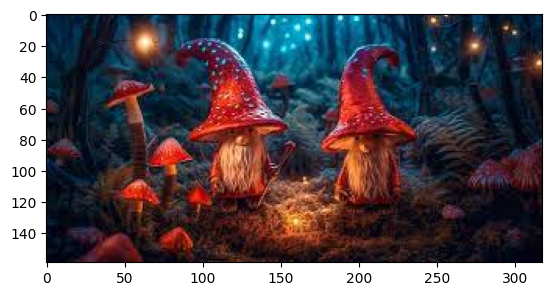

In [58]:
#U,S,V = np.linalg.svd(img, full_matrices=False)

img = np.array(im, dtype=np.float32)
im_size = os.stat(FILE).st_size


#im.save("fractal.jpg")

Раскладываем в RGB

In [16]:
r, g, b = im.split()
r,g,b = np.array((r,g,b), dtype=np.float32)
RGB = (r,g,b)

Функция оставляющаяя `k` сингулярных значений

In [23]:
def shrink_to_k(U,S,V,k):
    U = U[:, :k]
    S = np.diag(S[:k])
    V = V[:k, :]
    #print(f'New shapes are: U*S*V: {U.shape}*{S.shape}*{V.shape}')
    return U@S@V

Функция сжатия, оставляющая `k` синуглярных значений

In [28]:
def compress(channel, k = 900):
    U,S,V = np.linalg.svd(channel, full_matrices=False)
    #print("dims are: ", U.shape, S.shape, V.shape)
    new_im = shrink_to_k(U,S,V,k)
    return new_im


Сжатие RGB по отдельности и возвращение цветной картинки

In [30]:
def compress_rgb(RGB, k):
    r,g,b = RGB
    rk,gk,bk = compress(r, k=k), compress(g, k=k), compress(b,k=k)
    rgb = np.dstack((rk,gk,bk))
    return Image.fromarray(np.asarray(rgb, dtype=np.uint8))

In [97]:
def present(RGB,k, title="fractal"):
    new_im = compress_rgb(RGB, k)
    new_im.save(f"{title}-{k}.jpg")
    size =  os.stat(f'{title}-{k}.jpg').st_size
    title=f'K = {k}, compressed to {str(size/im_size)[:6]}%'
    return(new_im, title, size)
    #plt.imshow(new_im)
    #plt.title(f'K = {k}')
    #print(f"Size is: {size}")
    #print(f"Compressed to % of initial image")

In [98]:
def axis_present(RGB, title, ks=[1,2,5,10,50,100,500,800,1000]):
    fig, ax = plt.subplots(3, 3, layout="constrained")
    images = [present(RGB, i, title=title) for i in ks]
    for i in range(len(ks)):
        ax[i//3, i%3].imshow(images[i][0])
        ax[i//3, i%3].set_title(images[i][1])
        ax[i//3, i%3].axis('off')
    return(fig,ax)

# Примеры

## Когда-то срендеренный фрактал

Initial size is:  635812 bytes


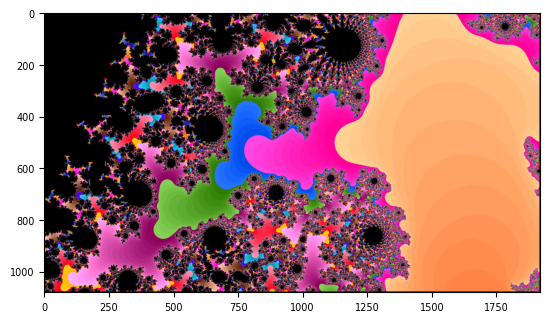

In [106]:
FILE = "fractal.jpg"

im = Image.open("fractal.jpg")

img = np.array(im, dtype=np.float32)

im_size = os.stat(FILE).st_size
print("Initial size is: ", im_size, "bytes")
plt.imshow(im)
r, g, b = im.split()
r,g,b = np.array((r,g,b), dtype=np.float32)
RGB = (r,g,b)

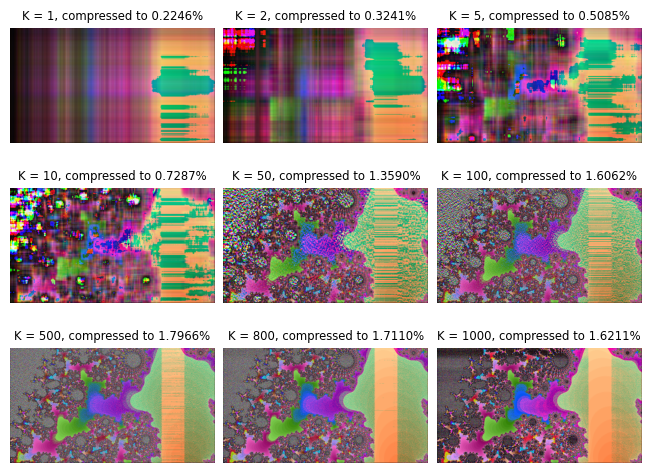

In [107]:
fig,ax = axis_present(RGB, "fractal")

## Гномики

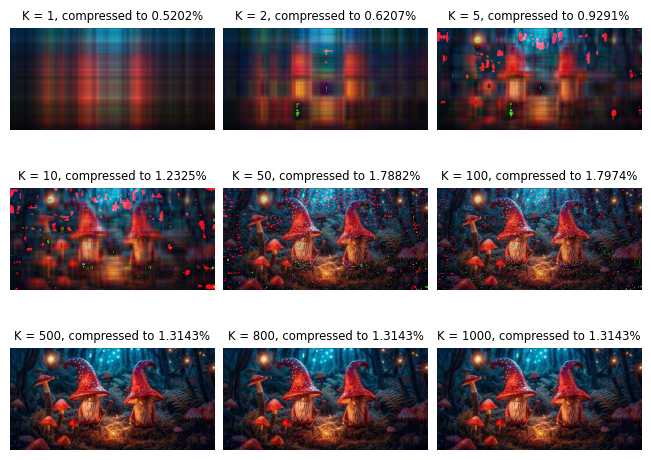

In [103]:
fig,ax = axis_present(RGB, "mushroom")